**линейный классификатор**

правило Розенблатта  

Евгений Борисов borisov.e@solarl.ru

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
from time import time

def get_seed(): t = time() ; return int(((t%1)/(t//1))*1e11)

In [3]:
n_samples = 500
n_clst = 2 # количество классов

X,y = make_blobs( 
        n_samples=n_samples,
        centers=n_clst,  
        random_state=get_seed(),
        cluster_std=[1.0,1.5,]
    )

In [4]:
X.shape, y.shape

((500, 2), (500,))

In [5]:
# значение y это 1 или 0

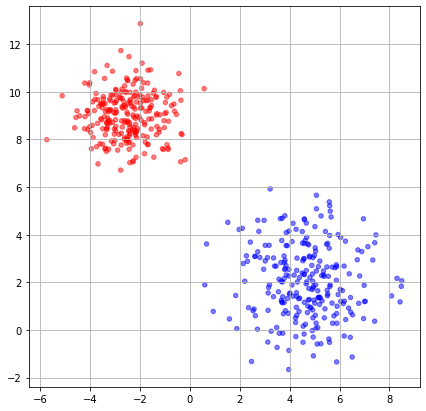

In [6]:
plt.figure(figsize=(7,7))
plt.scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0) else 'r' for j in y ], 
             s=20,
             alpha=0.5 )
plt.grid()
plt.show()

---

In [7]:
# биннаризация X

In [8]:
n=50
b = np.vstack([ np.linspace(X[:,j].min()-1,X[:,j].max()+1,n) for j in range(X.shape[1]) ])

In [9]:
# b

In [10]:
Xp = np.hstack([
    np.hstack([ ( (b[j,i]<X[:,j])&(X[:,j]<b[j,i+1]) ).astype(int).reshape(X.shape[0],1) 
    for i in range(b.shape[1]-1) ])
    for j in range(X.shape[1])
])

Xp.shape

(500, 98)

In [11]:
# Xp

---

In [12]:
# инициализация параметров
W = np.random.normal(loc=0.0, scale=0.1, size=Xp.shape[1])
W 

array([-0.15043813,  0.01532412,  0.03982287,  0.0056925 ,  0.04463765,
        0.08775509, -0.08190919,  0.05814029, -0.20853819, -0.09112131,
       -0.15099285, -0.06192914, -0.00643319,  0.07614367, -0.17130412,
       -0.01982215, -0.08739725,  0.03909229, -0.06222628,  0.00324537,
        0.19335109,  0.11887593,  0.13416824, -0.03844414,  0.04188458,
       -0.03496842, -0.15882945,  0.06250296, -0.03434828, -0.045205  ,
       -0.01013198,  0.02465019, -0.01306337, -0.11541776,  0.08581201,
       -0.0180953 ,  0.21024977,  0.02067934, -0.17873372,  0.02542713,
        0.11901791,  0.06055724, -0.03377935, -0.04804007,  0.00636424,
       -0.07648387,  0.0367993 , -0.00547303,  0.06887927,  0.17421114,
       -0.11742858, -0.01252373,  0.12055024, -0.12263662,  0.25078042,
        0.05817877,  0.07254193,  0.01466158,  0.0713783 ,  0.1158773 ,
        0.00505472,  0.02488269, -0.02372451, -0.13434187,  0.00221254,
       -0.04451623, -0.10606913, -0.04775028, -0.01494691,  0.04

In [13]:
def loss(x,w,y): return -x.dot(w)*y    

In [14]:
def accuracy(o,y,b=.5): return sum((o>b).astype(int)==y)/y.shape[0]

In [15]:
MAX_ITER = 10 # максимальное число циклов обучения
ACC_BOUND = .99

a=0.1 # скорость обучения
l = 0.5 # темп "забывания"

er_hist = [] # история ошибки

In [16]:
q = loss(Xp,W,y).sum()
er_hist.append(  accuracy( Xp.dot(W),y ) )

In [17]:
# метод стохастического градиентного спуска (SGD)
stop=False
for i in range(MAX_ITER):
    if stop: break
    for j in np.random.permutation(Xp.shape[0]):
        
        if er_hist[-1] > ACC_BOUND: # проверяем достижение порога
            print( 'acc bound on epoch %i step %i: %f'%(i,j,er_hist[-1]) )
            stop=True
            break

        xj,yj = Xp[j,:],y[j]
        
        r = (xj.dot(W)>0.5).astype(int) # выход
        W = W - a * xj.T.dot(r-y[j])
        
        # значение ф-ции потери
        qj = loss(xj,W,yj)
        q = l*qj +(1-l)*q
        
        er_hist.append( accuracy( Xp.dot(W), y ) )
        

acc bound on epoch 0 step 18: 0.992000


In [18]:
print(W)
print(len(er_hist),er_hist[-1],min(er_hist))

[-0.15043813  0.01532412  0.03982287  0.0056925   0.04463765  0.08775509
 -0.08190919  0.05814029 -0.20853819 -0.09112131 -0.15099285 -0.06192914
 -0.00643319  0.07614367 -0.17130412 -0.01982215 -0.08739725  0.03909229
 -0.06222628  0.00324537  0.19335109  0.11887593  0.23416824  0.06155586
  0.14188458  0.16503158  0.24117055  0.26250296  0.26565172  0.254795
  0.38986802  0.42465019  0.38693663  0.38458224  0.48581201  0.4819047
  0.41024977  0.42067934  0.32126628  0.52542713  0.31901791  0.36055724
  0.26622065 -0.04804007  0.10636424  0.22351613  0.0367993  -0.00547303
  0.06887927  0.17421114 -0.11742858  0.08747627  0.22055024  0.07736338
  0.35078042  0.35817877  0.37254193  0.31466158  0.4713783   0.4158773
  0.40505472  0.42488269  0.37627549  0.46565813  0.30221254  0.45548377
  0.29393087  0.45224972  0.18505309  0.34676733  0.50137363  0.23010671
  0.10004018  0.08097647  0.14877069 -0.08778716  0.00724496 -0.00472904
  0.08604475  0.107636   -0.12405809  0.18250738 -0.047

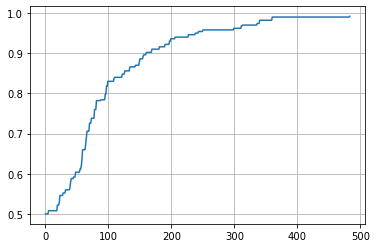

In [19]:
plt.plot(range(len(er_hist)),er_hist)
plt.grid()
plt.show()

---

In [20]:
o = Xp.dot(W)
accuracy( o,y ) 

0.992

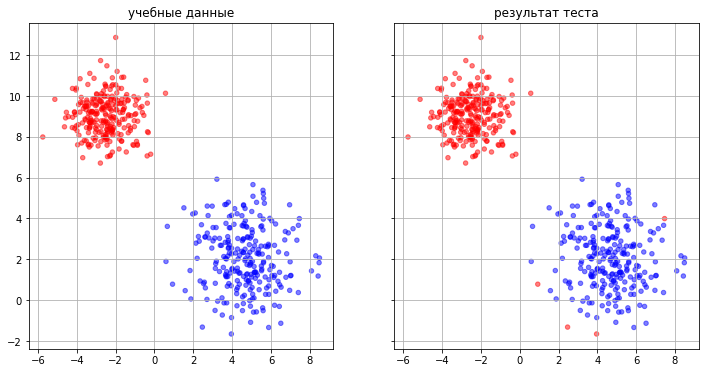

In [21]:
f, axarr = plt.subplots(1,2, sharex=True, sharey=True,figsize=(12,6),)
    
axarr[0].set_title('учебные данные')
axarr[0].scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0) else 'r' for j in y ], 
             s=20,
             alpha=0.5 )
axarr[0].grid()

axarr[1].set_title('результат теста')
axarr[1].scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0.5) else 'r' for j in o ], 
             s=20,
             alpha=0.5 )
axarr[1].grid()

plt.show()
